https://stackoverflow.com/questions/77684365/scipy-optimze-curve-fit-gives-a-high-standard-error-even-though-fit-seems-good

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.metrics import r2_score

In [2]:
def model(x, a, b):
    return a * x + b

In [3]:
data = pd.read_csv("Hysteresis.txt", sep="\t", header=None, names=["x", "y", "z"])

In [4]:
data["u"] = data["z"] / (2. * data["y"])

In [5]:
data["t"] = 0
#data.loc[0:488, "t"] = 0
data.loc[488:530, "t"] = 1
data.loc[530:1390, "t"] = 2
data.loc[1390:1430, "t"] = 3
#data.loc[1430:, "t"] = 0

0 0.844119238551804 [-4.29585719e-07 -1.27397584e-04] [6.27676896e-09 1.52481902e-06]
1 0.733147409548466 [ 8.58502916e-06 -3.05191197e-04] [8.18939540e-07 5.56526052e-05]
2 0.43378140123287146 [-1.62503164e-07  4.12090730e-04] [6.33832903e-09 1.69385354e-06]
3 0.6562435542810321 [1.18757579e-05 5.22226928e-04] [1.37632797e-06 4.97901997e-05]


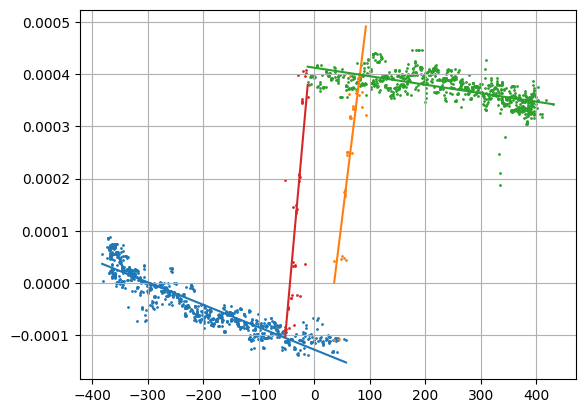

In [6]:
fig, axe = plt.subplots()
for i in data["t"].unique():
    
    q = data["t"] == i
    x = data.loc[q, "x"]
    y = data.loc[q, "u"]
    
    popt, pcov = optimize.curve_fit(model, x, y)
    yhat = model(x, *popt)
    score = r2_score(y, yhat)
    
    print(i, score, popt, np.sqrt(np.diag(pcov)))
    
    xlin = np.linspace(x.min(), x.max(), 100)
    ylin = model(xlin, *popt)
    
    axe.scatter(x, y, marker=".", s=4)
    axe.plot(xlin, ylin)
    
axe.grid()